In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Q1

In [ ]:
class Perceptron:
  def __init__(self, num, rate):
    np.random.seed(0)
    self.num_points = num
    self.label_1 = -1
    self.label_2 = 1

    self.data = np.abs(np.random.randn(self.num_points, 2))   # creating linearly separable data
    self.label = np.where(self.data[:, 0] > self.data[:, 1], 1, -1) # y = sign(x1 - x0)
    self.indices = np.random.permutation(self.num_points)

    self.split = int(0.7 * self.num_points)   # separating as 70% train data and 30% test data
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]

    self.learning_rate = rate
    self.weights = None
    self.bias = None

  def train(self, epochs):
    self.weights = np.zeros(2, dtype=np.float32)  # inital weight and bias
    self.bias = np.float32(0.0)

    for i in range(epochs):
      for row in range(len(self.x_train)):   # train for epochs
        y = np.matmul(self.weights, self.x_train[row]) + self.bias
        if y != self.y_train [row]: # predicted label and actual label are different
          self.weights+= self.learning_rate*self.x_train[row]*self.y_train[row] #update weight and bias
          self.bias+= self.learning_rate*self.y_train[row]
    print(f"Training done")

  def test(self):
    self.val = np.matmul(self.x_test, self.weights)+ self.bias  # testing with test data set
    self.y_pred = np.where(self.val >= 0, 1, -1)
    self.count_pred = (self.y_pred == self.y_test).sum()  # calculating accuracy and number of misclassifications
    self.accuracy = self.count_pred / len(self.y_test) * 100
    print("Accuracy:" ,self.accuracy)
    misclassified = (self.y_pred != self.y_test).sum()
    print("Misclassified:", misclassified)
    return self.accuracy, misclassified

  def data_modify(self):
    indices = np.random.randint(0,self.num_points, size = int(0.1*self.num_points))  # introduce noise to 10% of points
    self.label[indices] = -self.label[indices]
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]

  def plot_data(self):  # plotting the inital dataset
    plt.figure(figsize=(6, 6))
    plt.scatter(self.x_train[self.y_train == -1, 0], self.x_train[self.y_train == -1, 1], color='blue', label='Class -1', alpha=0.6, marker='x')
    plt.scatter(self.x_train[self.y_train == 1, 0], self.x_train[self.y_train == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Linearly Separable")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def plot_boundary(self, X, y):  # plotting the decision surface learned
    x_cord = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    plt.figure(figsize=(6, 6))

    if self.weights[1] != 0:
      y_cord = (-self.weights[0] / self.weights[1]) * x_cord - (self.bias / self.weights[1])
      plt.plot(x_cord, y_cord, 'k--', label="Decision Boundary")

    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class -1', alpha=0.6, marker='x')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def plot_train_boundary(self):
    self.plot_boundary(self.x_train, self.y_train)

  def plot_test_boundary(self):
    self.plot_boundary(self.x_test, self.y_test)

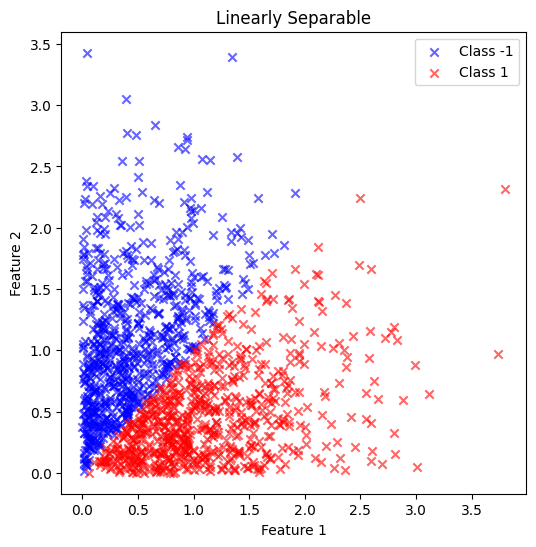

In [ ]:
p = Perceptron(2000, 0.001)
p.plot_data()

Training done


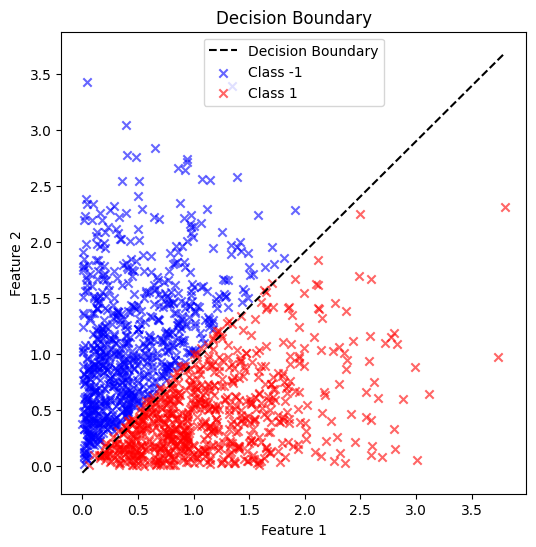

In [ ]:
# @title Training for 10 epochs
p.train(10)
p.plot_train_boundary()

Accuracy: 96.5
Misclassified: 21


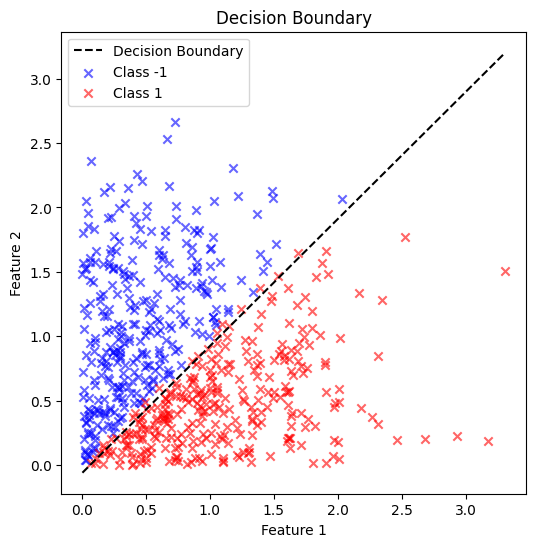

In [ ]:
accuracy_perceptron, misclassified_perceptron = p.test()
p.plot_test_boundary()

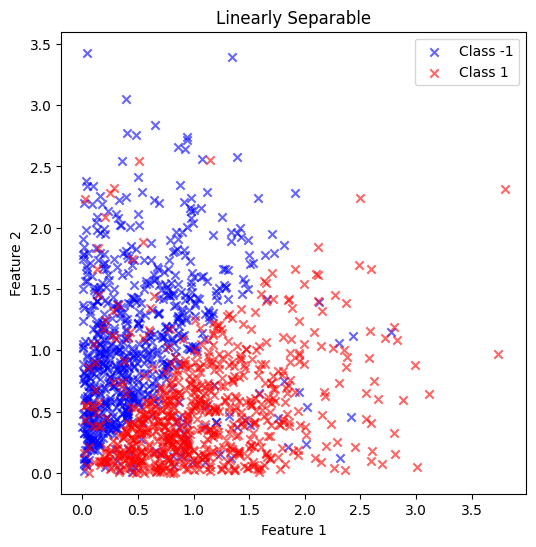

In [ ]:
# @title Adding noise
p.data_modify()
p.plot_data()

#### Training for 10 epochs

Training done


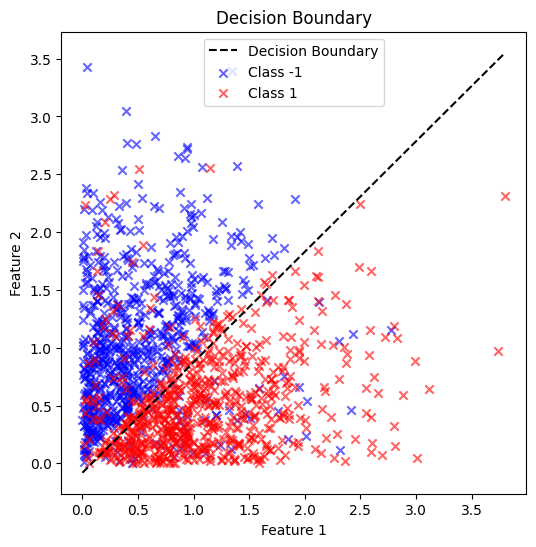

In [ ]:
p.train(10)
p.plot_train_boundary()

Accuracy: 84.33333333333334
Misclassified: 94


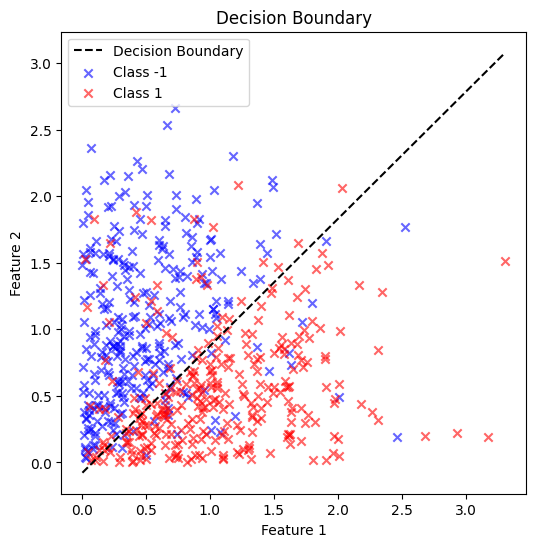

In [ ]:
accuracy_perceptron_noisy, misclassified_perceptron_noisy = p.test()
p.plot_test_boundary()

#### Training for 100 epochs

Training done


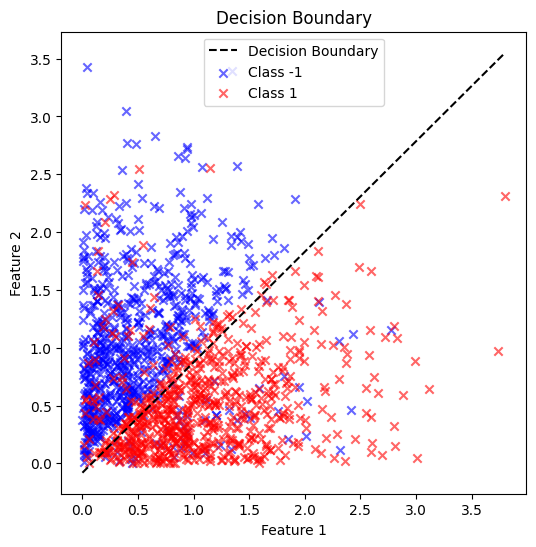

In [ ]:
p.train(100)
p.plot_train_boundary()

Accuracy: 84.33333333333334
Misclassified: 94


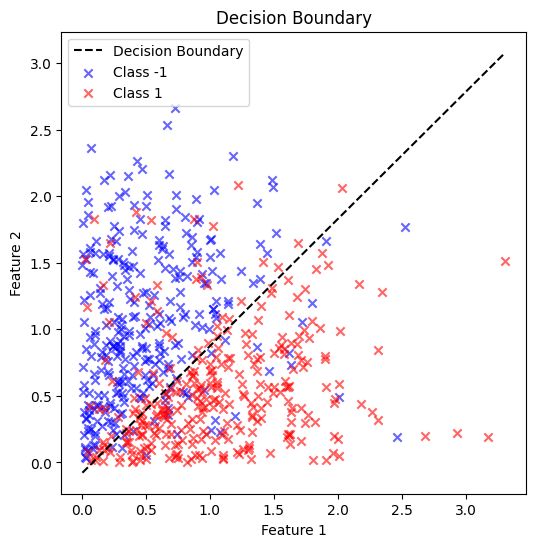

In [ ]:
accuracy_perceptron_noisy, misclassified_perceptron_noisy = p.test()
p.plot_test_boundary()

#### Training for 150 epochs

Training done


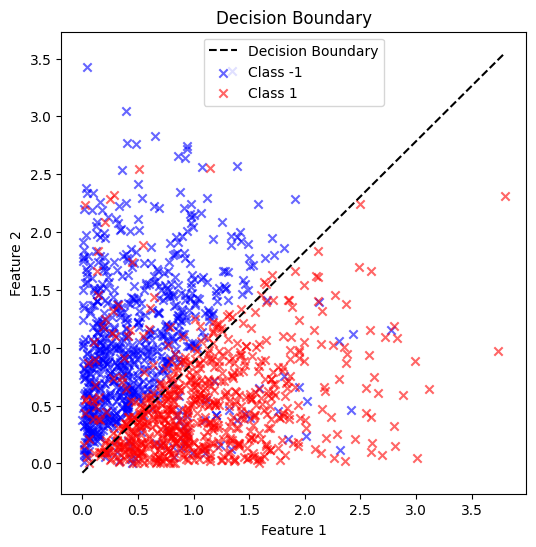

In [ ]:
p.train(150)
p.plot_train_boundary()

Accuracy: 84.33333333333334
Misclassified: 94


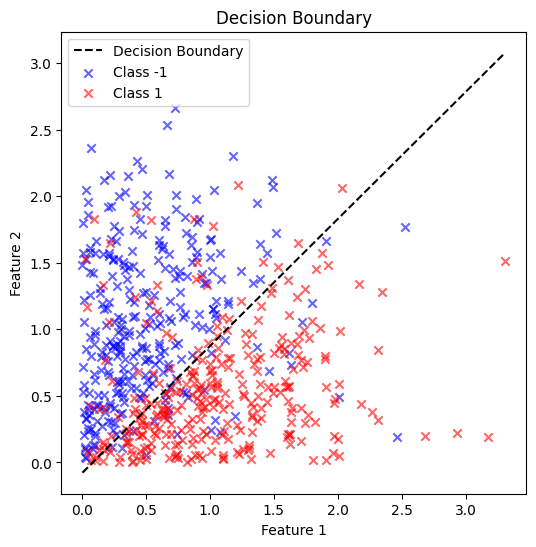

In [ ]:
accuracy_perceptron_noisy, misclassified_perceptron_noisy = p.test()
p.plot_test_boundary()

#### Comparision of Accuracy & Misclassification

In [ ]:
import pandas as pd

results_comparison = {
    "Model": ["Perceptron (Clean)", "Perceptron (Noisy)"],
    "Accuracy": [accuracy_perceptron, accuracy_perceptron_noisy],
    "Misclassified Points": [misclassified_perceptron, misclassified_perceptron_noisy]
}

df = pd.DataFrame(results_comparison)
df

Model   Accuracy  Misclassified Points
0  Perceptron (Clean)  96.500000                    21
1  Perceptron (Noisy)  84.333333                    94

Table shows how Perceptron dealt with Noisy inputs => Accuracy decreases

## Q2

#### Hinge Loss

In [ ]:
class Gradient_descent:
  def __init__(self, num, rate, reg):
    np.random.seed(0)
    self.num_points = num
    self.data = np.abs(np.random.randn(self.num_points, 2))
    self.label = np.where(self.data[:, 0] > self.data[:, 1], 1, -1) # y = sign(x0, x1)
    self.indices = np.random.permutation(self.num_points)
    self.split = int(0.7 * self.num_points)
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]
    self.learning_rate = rate
    self.reg = reg
    self.threshold = 1e-3 # early stopping

  def train(self, epochs):
    self.prev_loss = 0
    self.weights = np.random.randn(2).astype(np.float32)
    self.bias = np.float32(0.0)
    for i in range(epochs):
      self.y_pred = np.matmul(self.x_train, self.weights) + self.bias # (W.T * X + B)
      self.hinge_loss = np.maximum(1 - self.y_train * self.y_pred, 0).mean()   #hinge loss
      self.net_loss = self.hinge_loss + (self.reg / 2) * np.linalg.norm(self.weights, ord=2) ** 2 # Regularization
      if (abs(self.prev_loss - self.net_loss ) < self.threshold) and i > 10: # early stopping
        print(f"Converged at {i+1} iteration")
        break
      self.prev_loss = self.net_loss
      self.misclass = (self.y_pred * self.y_train  <1).astype(np.float32)

      self.w_grad = -np.mean(self.misclass[:, None] * self.y_train[:, None] * self.x_train, axis=0) + self.reg * self.weights  #gradient calculation
      self.b_grad = -np.mean(self.misclass * self.y_train)
      # weight updates
      self.weights -= self.learning_rate * self.w_grad
      self.bias -= self.learning_rate * self.b_grad

  def test(self):
    self.val = np.matmul(self.x_test, self.weights)+ self.bias # predictions
    self.y_pred = np.where( self.val>=0 , 1,-1)
    self.count_pred = (self.y_pred == self.y_test).sum()
    self.accuracy = self.count_pred / len(self.y_test) * 100 #calulating accuracy

    print("Accuracy:" ,self.accuracy)
    misclassified = (self.y_pred != self.y_test).sum()
    print("Misclassified:", misclassified)
    return self.accuracy, misclassified

  def data_modify(self): # Adding noise
    indices = np.random.randint(0, self.num_points, size=int(0.1 * self.num_points))
    self.label[indices] = -self.label[indices]
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]

  def plot_data(self):
    plt.figure(figsize=(6, 6))
    plt.scatter(self.x_train[self.y_train == -1, 0], self.x_train[self.y_train == -1, 1], color='blue', label='Class -1', alpha=0.6, marker='x')
    plt.scatter(self.x_train[self.y_train == 1, 0], self.x_train[self.y_train == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Linearly Separable")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def plot_boundary(self, X, y):
    x_cord = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    plt.figure(figsize=(6, 6))

    if self.weights[1] != 0:
      y_cord = (-self.weights[0] / self.weights[1]) * x_cord - (self.bias / self.weights[1])
      plt.plot(x_cord, y_cord, 'k--', label="Decision Boundary")

    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class -1', alpha=0.6, marker='x')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def plot_train_boundary(self):
    self.plot_boundary(self.x_train, self.y_train)

  def plot_test_boundary(self):
    self.plot_boundary(self.x_test, self.y_test)

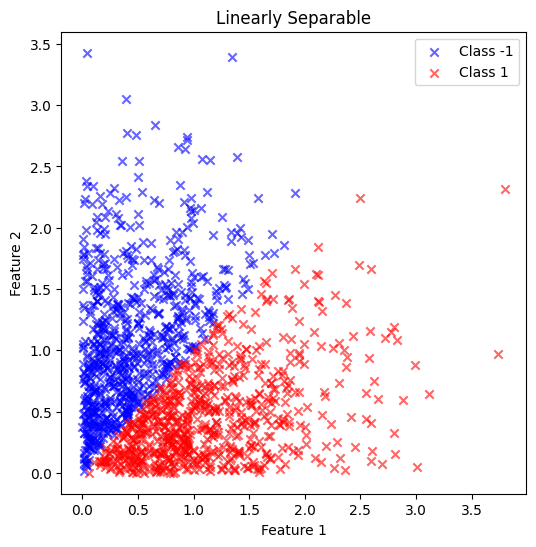

In [ ]:
gd = Gradient_descent(2000, 0.6, 0.001)
gd.plot_data()

Converged at 51 iteration


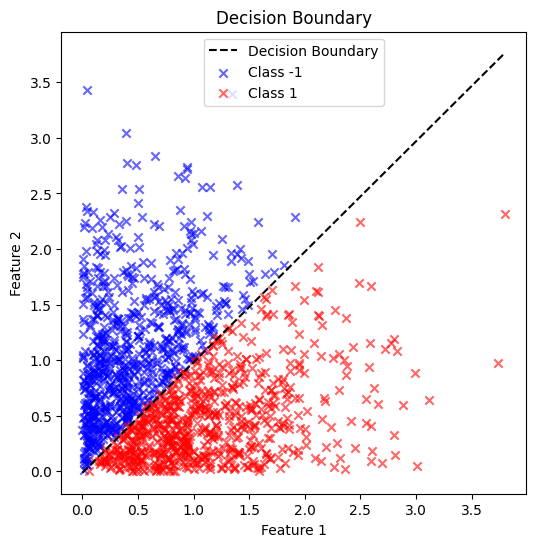

In [ ]:
# @title Training for 100 epochs
gd.train(100)
gd.plot_train_boundary()

Accuracy: 99.0
Misclassified: 6


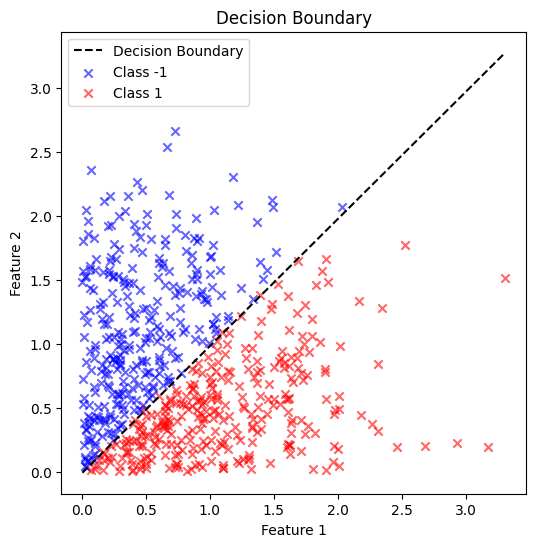

In [ ]:
accuracy_gd_hinge, misclassified_gd_hinge = gd.test()
gd.plot_test_boundary()

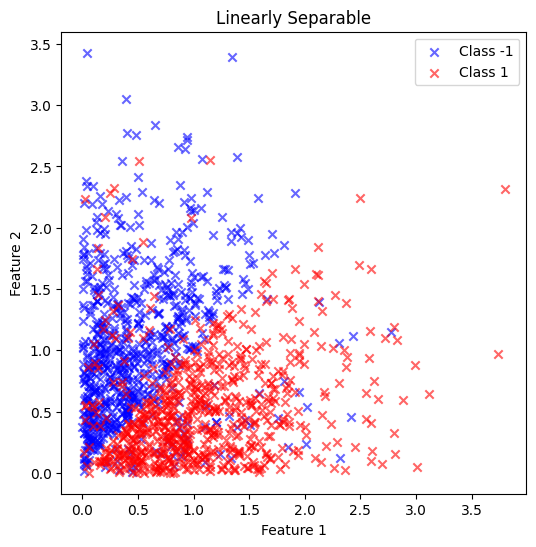

In [ ]:
# @title Add noise to dataset
gd.data_modify()
gd.plot_data()

Converged at 40 iteration


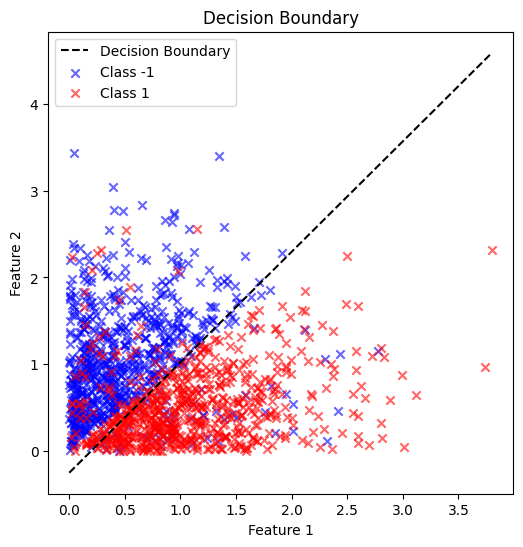

In [ ]:
# @title Training for 100 epochs

gd.train(100)
gd.plot_train_boundary()

Accuracy: 84.83333333333334
Misclassified: 91


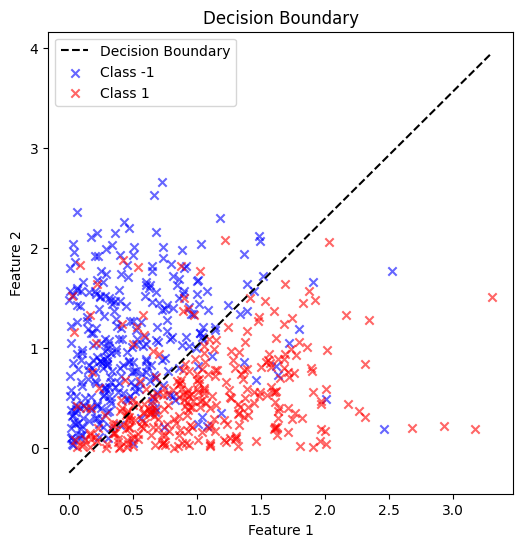

In [ ]:
accuracy_gd_hinge_noisy, misclassified_gd_hinge_noisy = gd.test()
gd.plot_test_boundary()

#### Cross entropy loss

In [ ]:
class Gradient_descent:
  def __init__(self, num, rate, reg):
    np.random.seed(0)
    self.num_points = num
    self.data = np.abs(np.random.randn(self.num_points, 2)) # dataset generation
    self.label = np.where(self.data[:, 0] > self.data[:, 1], 1, 0) # y = sign(x0, x1)
    self.indices = np.random.permutation(self.num_points)
    self.split = int(0.7 * self.num_points)
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]
    self.learning_rate = rate
    self.reg = reg
    self.threshold = 1e-6

  def plot_data(self):
    plt.figure(figsize=(6, 6))
    plt.scatter(self.x_train[self.y_train == 0, 0], self.x_train[self.y_train == 0, 1], color='blue', label='Class 0', alpha=0.6, marker='x')
    plt.scatter(self.x_train[self.y_train == 1, 0], self.x_train[self.y_train == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Linearly Separable")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def train(self, epochs):
    self.prev_loss = 0 # to determine early stopping
    self.weights = np.random.randn(2).astype(np.float32)  # initialize weights
    self.bias = np.float32(0.0)
    val = 1e-8
    for i in range(epochs):
      self.y_pred = np.matmul(self.x_train, self.weights) + self.bias # W.T * X + B
      self.y_pred = 1/(1+ np.exp(-self.y_pred)) # Sigmoid
      self.net_loss = -np.mean(self.y_train * np.log(self.y_pred + val) + (1 - self.y_train) * np.log(1 - self.y_pred + val)) # Log Loss Calc
      if (abs(self.prev_loss - self.net_loss ) < self.threshold) and i > 10: # early stopping
        print(f"Converged at {i+1} iteration")
        break
      self.prev_loss = self.net_loss

      # Gradient Calc & Weight Updation
      self.w_grad = np.mean((self.y_pred - self.y_train)[:, None] * self.x_train, axis=0)
      self.b_grad = np.mean(self.y_pred - self.y_train)
      self.weights -= self.learning_rate * self.w_grad
      self.bias -= self.learning_rate * self.b_grad

  def plot_boundary(self, X, y): # plot decision boundary
    plt.figure(figsize=(6, 6))
    self.x_cord = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    if self.weights[1] != 0:
      self.y_cord = - (self.weights[0].item() * self.x_cord - self.bias.item()) / self.weights[1].item()
      plt.plot(self.x_cord, self.y_cord, 'k--', label="Decision Boundary")
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6, marker='x')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1', alpha=0.6, marker='x')
    plt.legend()
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

  def plot_train_boundary(self):
    self.plot_boundary(self.x_train, self.y_train)

  def plot_test_boundary(self):
    self.plot_boundary(self.x_test, self.y_test)

  def test(self):
    self.val = np.matmul(self.x_test, self.weights)+ self.bias
    self.y_pred = np.where( self.val>=0 , 1,0)
    self.count_pred = (self.y_pred == self.y_test).sum()
    self.accuracy = self.count_pred / len(self.y_test) * 100 # Predicting accuracy and misclassification

    print("Accuracy:" ,self.accuracy)
    misclassified = (self.y_pred != self.y_test).sum()
    print("Misclassified:", misclassified)
    return self.accuracy, misclassified

  def data_modify(self): # Add noise
    indices = torch.randint(0,self.num_points, (int(0.1*self.num_points),))
    self.label[indices] = 1 - self.label[indices]
    self.x_train, self.x_test = self.data[self.indices[:self.split]], self.data[self.indices[self.split:]]
    self.y_train, self.y_test = self.label[self.indices[:self.split]], self.label[self.indices[self.split:]]

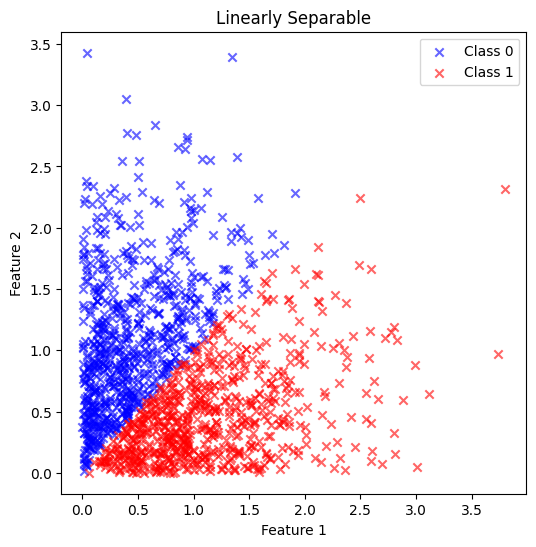

In [ ]:
gd = Gradient_descent(2000, 0.6, 0.001)
gd.plot_data()

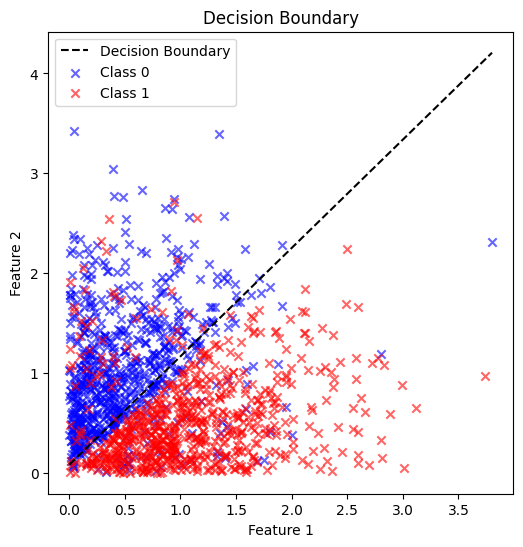

In [ ]:
# @title Training for 100 epochs

gd.train(100)
gd.plot_train_boundary()

Accuracy: 99.0
Misclassified: 6


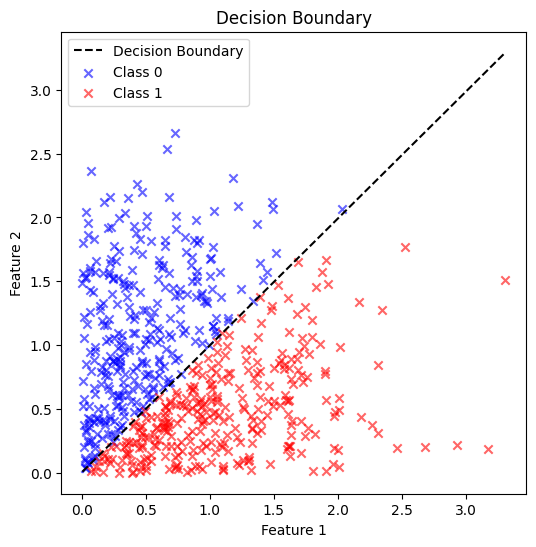

In [ ]:
accuracy_gd_log_loss, misclassified_gd_log_loss = gd.test()
gd.plot_test_boundary()

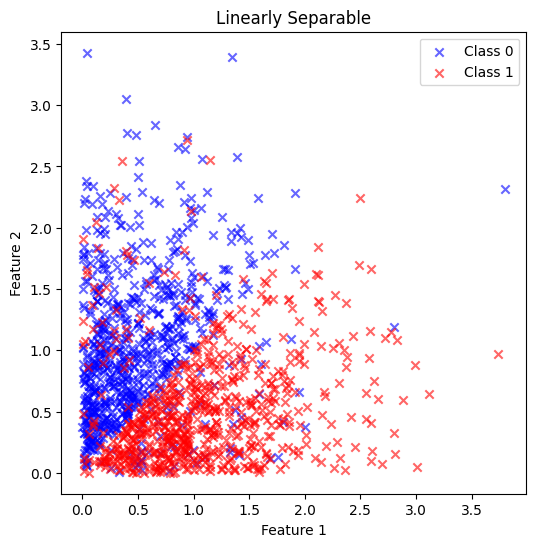

In [ ]:
# @title Add noise

gd.data_modify()
gd.plot_data()

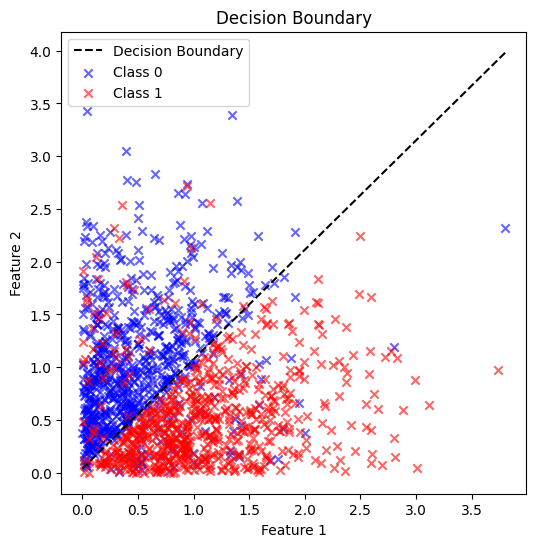

In [ ]:
# @title Training for 100 epochs

gd.train(100)
gd.plot_train_boundary()

Accuracy: 89.16666666666667
Misclassified: 65


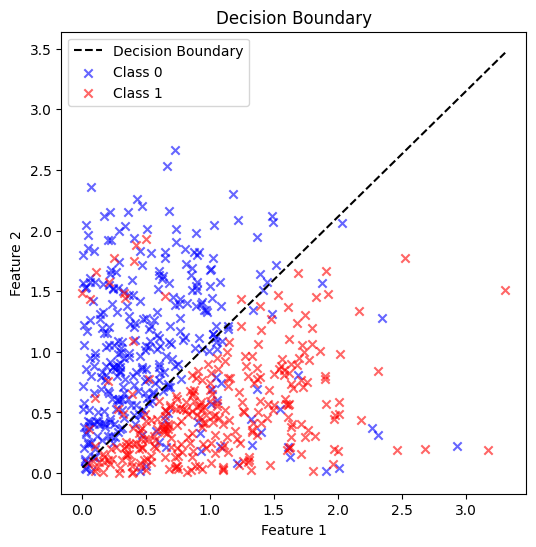

In [ ]:
accuracy_gd_log_loss_noisy, misclassified_gd_log_loss_noisy = gd.test()
gd.plot_test_boundary()

In [ ]:
# @title Result Comparison

import pandas as pd

results_comparison = {
    "Model": ["Perceptron (Clean)", "Perceptron (Noisy)", "Gradient Descent - Hinge (Clean)", "Gradient Descent - Hinge (Noisy)", "Gradient Descent - Log Loss (Clean)", "Gradient Descent - Log Loss (Noisy)"],
    "Accuracy": [accuracy_perceptron, accuracy_perceptron_noisy, accuracy_gd_hinge, accuracy_gd_hinge_noisy, accuracy_gd_log_loss, accuracy_gd_log_loss_noisy],
    "Misclassified Points": [misclassified_perceptron, misclassified_perceptron_noisy, misclassified_gd_hinge, misclassified_gd_hinge_noisy, misclassified_gd_log_loss, misclassified_gd_log_loss_noisy]
}

df = pd.DataFrame(results_comparison)
df

Model   Accuracy  Misclassified Points
0                   Perceptron (Clean)  96.500000                    21
1                   Perceptron (Noisy)  84.333333                    94
2     Gradient Descent - Hinge (Clean)  99.000000                     6
3     Gradient Descent - Hinge (Noisy)  84.833333                    91
4  Gradient Descent - Log Loss (Clean)  99.000000                     6
5  Gradient Descent - Log Loss (Noisy)  89.166667                    65

#### Hinge Loss vs Log Loss

From the above observations both hinge loss and log loss gave accuracy of 99% and misclassified 6 points when ran for 100 epochs. The dataset used was completely linearly separable without any outliers.

When 10% noise was introduced in the dataset, log loss outperformed hinge loss.
Log loss gave an accuracy of 89.16% with 65 misclassifications while hinge loss provided only 84% accuracy with 91 points being misclassified.

In real world datsets log loss is preferred more due to its robustness towards noise. This is due to the probablistic confidence provided by log loss for each decision class.

## Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_samples=1000, train_ratio=0.7):
    np.random.seed(0)

    X1 = np.random.uniform(-5, 5, n_samples) # uniform maintains std dev
    X2 = np.random.uniform(-5, 5, n_samples)

    # Non Linear Function y = sin(x1) + 0.5 * (x2)^2 - 0.3 * cos(x1 * x2) + noise
    y = np.sin(X1) + 0.5 * X2**2 - 0.3 * np.cos(X1 * X2) + np.random.normal(0, 0.3, n_samples)
    y = y.reshape(-1, 1)

    X = np.vstack([X1, X2]).T

    indices = np.random.permutation(n_samples)
    split = int(train_ratio * n_samples)

    X_train, X_test = X[indices[:split]], X[indices[split:]]
    y_train, y_test = y[indices[:split]], y[indices[split:]]

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Comparison plot

    sc1 = axs[0].scatter(X[:, 0], y, c=X[:, 1], cmap='coolwarm', alpha=0.7, marker = 'x')
    axs[0].set_xlabel("Feature 1 (X[:, 0])")
    axs[0].set_ylabel("Target (y)")
    axs[0].set_title("Feature 1 vs Target")
    plt.colorbar(sc1, ax=axs[0], label="Feature 2 Value")

    sc2 = axs[1].scatter(X[:, 1], y, c=X[:, 0], cmap='coolwarm', alpha=0.7, marker = 'x')
    axs[1].set_xlabel("Feature 2 (X[:, 1])")
    axs[1].set_ylabel("Target (y)")
    axs[1].set_title("Feature 2 vs Target")
    plt.colorbar(sc2, ax=axs[1], label="Feature 1 Value")

    plt.tight_layout()
    plt.show()

    return X_train, X_test, y_train, y_test

In [ ]:
class MLPerceptron:
  def __init__(self, num_input, num_hidden, num_output, learning_rate, init_method="random", loss_name = "mse"):
    np.random.seed(0)
    # Weight Init according to parameter
    if init_method == "zero":
      self.weights_hidden = np.zeros((num_input, num_hidden), dtype=np.float32 )
      self.bias_hidden = np.random.randn(1, num_hidden).astype(np.float32) * 0.01
      self.weights_output = np.zeros((num_hidden, num_output), dtype=np.float32) * 0.01
      self.bias_output = np.random.randn(1, num_output).astype(np.float32) * 0.01
    elif init_method == "random":
      # Lower weight value to minimize the chance of gradient explosion
      self.weights_hidden = np.random.randn(num_input, num_hidden).astype(np.float32) * 0.01
      self.bias_hidden = np.zeros((1,num_hidden), dtype=np.float32)
      self.weights_output = np.random.randn(num_hidden, num_output).astype(np.float32) * 0.01
      self.bias_output = np.zeros((1,num_output), dtype=np.float32)
    self.loss_name = loss_name
    self.learning_rate = learning_rate
    self.num_points = 1000

  def activation(self, input): # ReLU
    return  np.maximum(input, 0)

  def forward(self, data):
    self.s1 = np.dot(data, self.weights_hidden) + self.bias_hidden # W.T * X + B
    self.x1 = self.activation(self.s1)
    self.s2 = np.dot(self.x1, self.weights_output) + self.bias_output # Output Layer
    return self.s2

  def backward(self, x, y, y_pred):
    m = y.shape[0]

    # dealing with different loss
    if self.loss_name == "mse":
      self.dL_ds2 = (2 / m) * (y_pred - y)
    else:
      self.dL_ds2 = np.where(y_pred > y, 1, -1) / m

    self.dL_dw2 = np.dot(self.x1.T, self.dL_ds2)
    self.dL_db2 = np.sum(self.dL_ds2, axis=0, keepdims=True)

    self.dL_dx1 = np.dot(self.dL_ds2, self.weights_output.T)
    self.dL_ds1 = self.dL_dx1 * (self.s1 > 0).astype(float) # Gradient of ReLU
    self.dL_dw1 = np.dot(x.T, self.dL_ds1)
    self.dL_db1 = np.sum(self.dL_ds1, axis=0, keepdims=True)

    # Weight Updation
    self.weights_hidden -= self.learning_rate * self.dL_dw1
    self.bias_hidden -= self.learning_rate * self.dL_db1
    self.weights_output -= self.learning_rate * self.dL_dw2
    self.bias_output -= self.learning_rate * self.dL_db2

  def train(self, X, y, epochs=1000):
    loss_history = []
    for i in range(epochs):
        y_pred = self.forward(X)  # Forward pass

        if self.loss_name == "mse": # dealing with different loss
          loss = np.mean((y - y_pred) ** 2)
        else:
          loss = np.mean(np.abs(y - y_pred))
        loss_history.append(loss)  # Append loss value for plotting
        self.backward(X, y, y_pred)
        if np.isnan(loss):
            print("Gradient exploded")
            break

    return loss_history

  def test(self,X,y):
    self.s1_test = np.dot(X, self.weights_hidden) + self.bias_hidden  # W.T * X + B
    self.x1_test = self.activation(self.s1_test)
    self.y_pred_test = np.dot(self.x1_test, self.weights_output) + self.bias_output  # Output layer

    if self.loss_name == "mse":
        loss = np.mean((self.y_pred_test - y) ** 2)
    else:
        loss = np.mean(np.abs(y - self.y_pred_test))


    self.test_loss = loss

    print(f"The loss is {self.test_loss:.4f}")

    return loss

  def plot(self,y): # Plot Model Performance
    plt.scatter(y, self.y_pred_test, color='blue', label="Predicted vs Actual", marker = 'x')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.title("MLP Regression Model Performance")
    plt.show()

  def calculate_convergence_rate(self, loss_history):
    return (loss_history[0] - loss_history[-1]) / len(loss_history)

  def plot_fitting_curve(self, X, y):
      y_pred = self.forward(X)
      fig, ax = plt.subplots(1, 2, figsize=(12, 5))

      # Feature with Actual and Predicted Y

      ax[0].scatter(X[:, 0], y, color='blue', label='Actual Data', marker = 'x')
      ax[0].scatter(X[:, 0], y_pred, color='red', alpha=0.7, label='Fitted Curve', marker = 'x')
      ax[0].set_xlabel("Feature 1")
      ax[0].set_ylabel("Target (y)")
      ax[0].set_title("Fitted Curve for Feature 1")
      ax[0].legend()

      ax[1].scatter(X[:, 1], y, color='blue', label='Actual Data', marker = 'x')
      ax[1].scatter(X[:, 1], y_pred, color='red', alpha=0.7, label='Fitted Curve', marker = 'x')
      ax[1].set_xlabel("Feature 2")
      ax[1].set_ylabel("Target (y)")
      ax[1].set_title("Fitted Curve for Feature 2")
      ax[1].legend()

      plt.tight_layout()
      plt.show()

### Generate data for regression

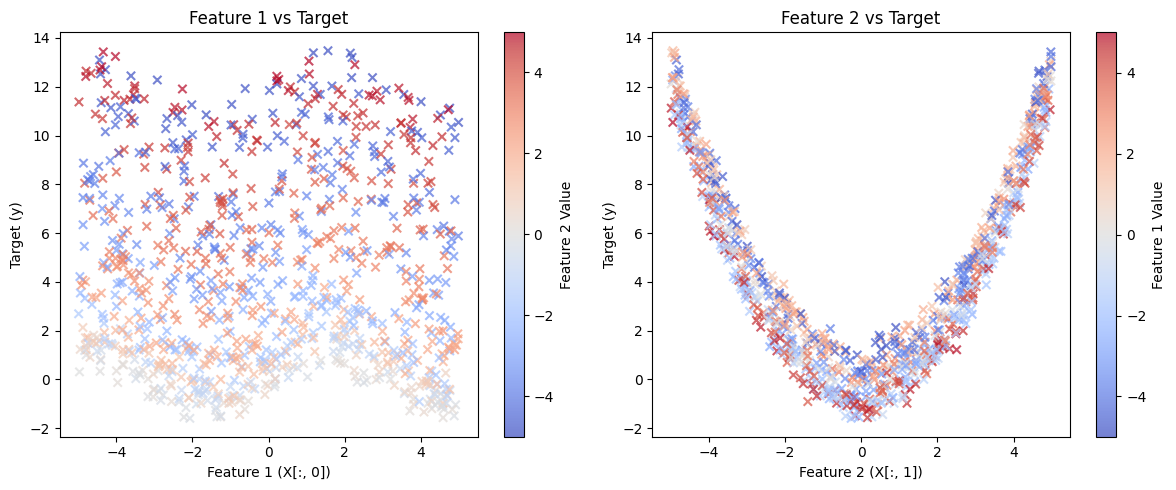

(700, 2)
(300, 2)
(700, 1)
(300, 1)


In [ ]:
X_train, X_test, y_train, y_test = generate_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Different Combination Cases
# Error Functions - MSE, MAE
# Hidden Layers - 128, 64, 16
# Learning Rate - 0.01, 0.001
# Weight Initialisation - zero, random

configs = [
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.01, "init_method": "random", "loss_name": "mse"},
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.01, "init_method": "random", "loss_name": "mae"},
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.01, "init_method": "zero", "loss_name": "mse"},
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.01, "init_method": "zero", "loss_name": "mae"},
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.001, "init_method": "zero", "loss_name": "mse"},
    {"num_input": 2, "num_hidden": 128, "num_output": 1, "learning_rate": 0.001, "init_method": "zero", "loss_name": "mae"},
    {"num_input": 2, "num_hidden": 64, "num_output": 1, "learning_rate": 0.001, "init_method": "zero", "loss_name": "mse"},
    {"num_input": 2, "num_hidden": 16, "num_output": 1, "learning_rate": 0.001, "init_method": "zero", "loss_name": "mse"},
]

In [ ]:
models = []

for config in configs:
    model = MLPerceptron(**config) # Create Model with config
    loss_history = model.train(X_train, y_train, epochs=18000) # Trigger Training
    convergence_rate = model.calculate_convergence_rate(loss_history)
    models.append({'config': config, 'model': model, 'convergence_rate': convergence_rate, 'loss_history': loss_history})

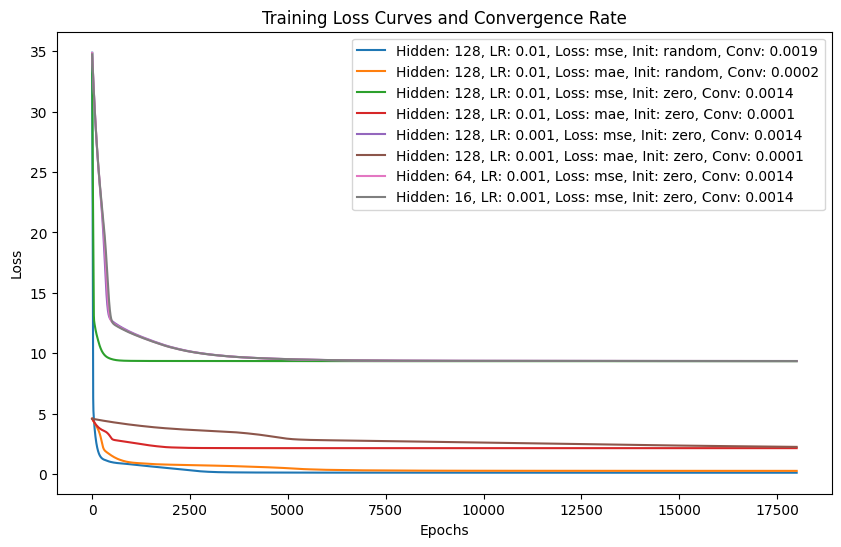

In [ ]:
# @title Loss Curves

plt.figure(figsize=(10, 6))

for model in models:
  config = model['config']
  convergence_rate = model['convergence_rate']
  plt.plot(model['loss_history'], label=f"Hidden: {config['num_hidden']}, LR: {config['learning_rate']}, Loss: {config['loss_name']}, Init: {config['init_method']}, Conv: {convergence_rate:.4f}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curves and Convergence Rate")
plt.legend()
plt.show()

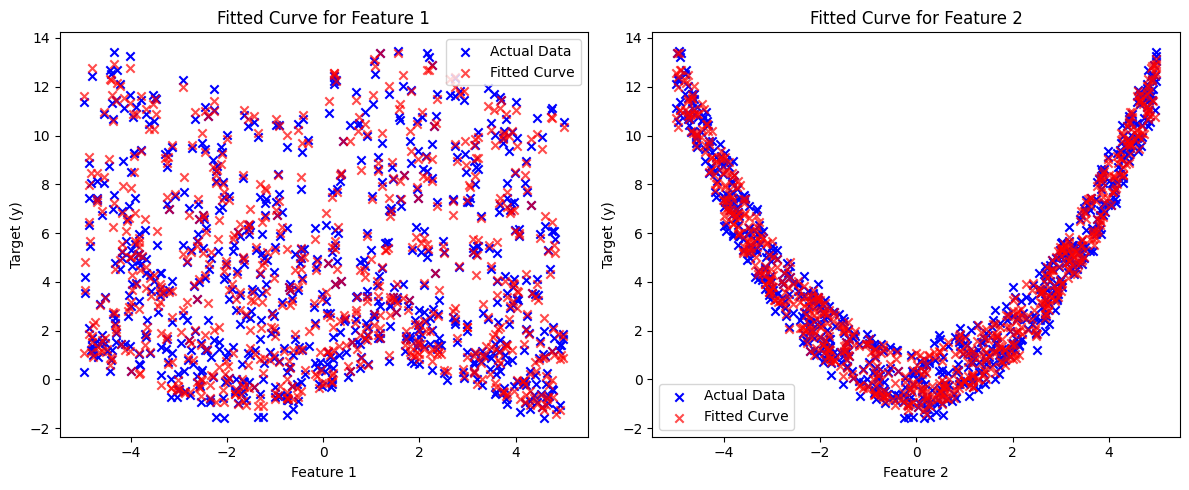

Hidden: 128, LR: 0.01, Loss: mse, Init: random, Conv: 0.0019


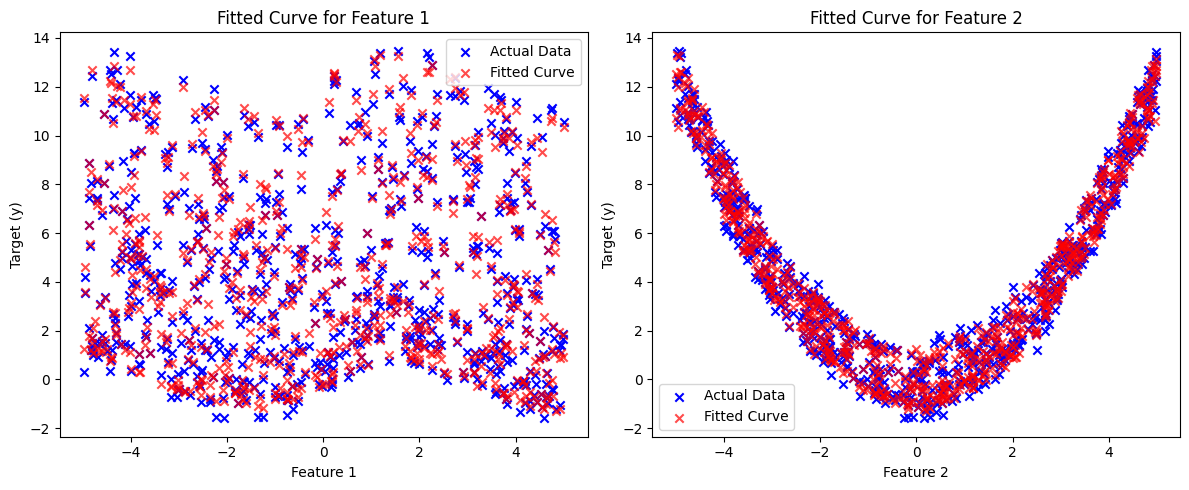

Hidden: 128, LR: 0.01, Loss: mae, Init: random, Conv: 0.0002


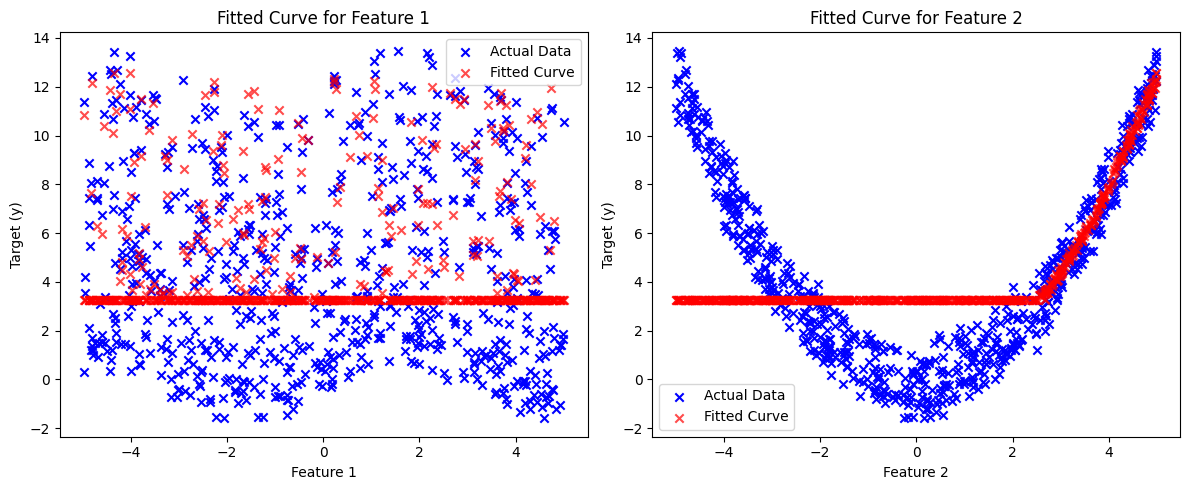

Hidden: 128, LR: 0.01, Loss: mse, Init: zero, Conv: 0.0014


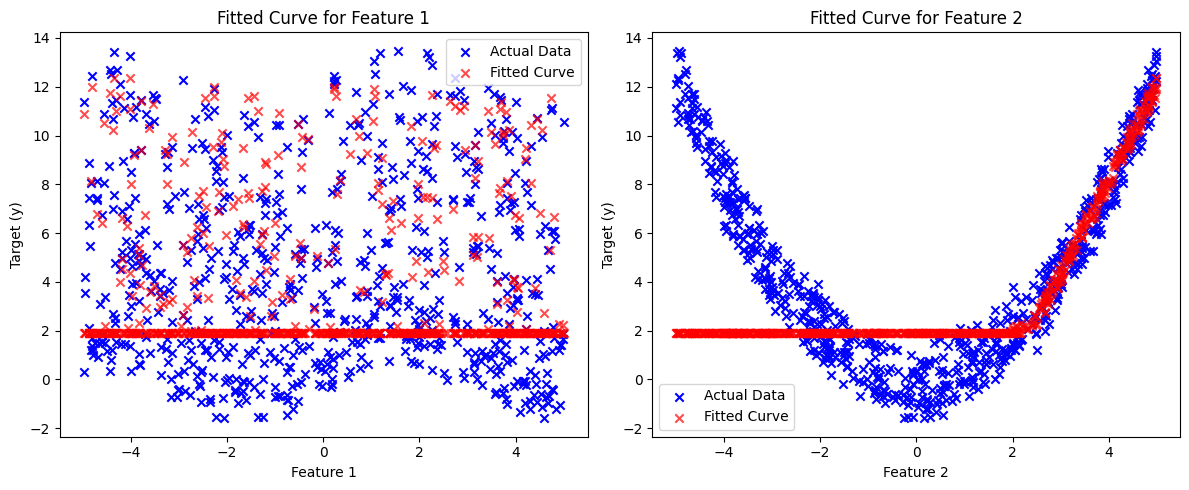

Hidden: 128, LR: 0.01, Loss: mae, Init: zero, Conv: 0.0001


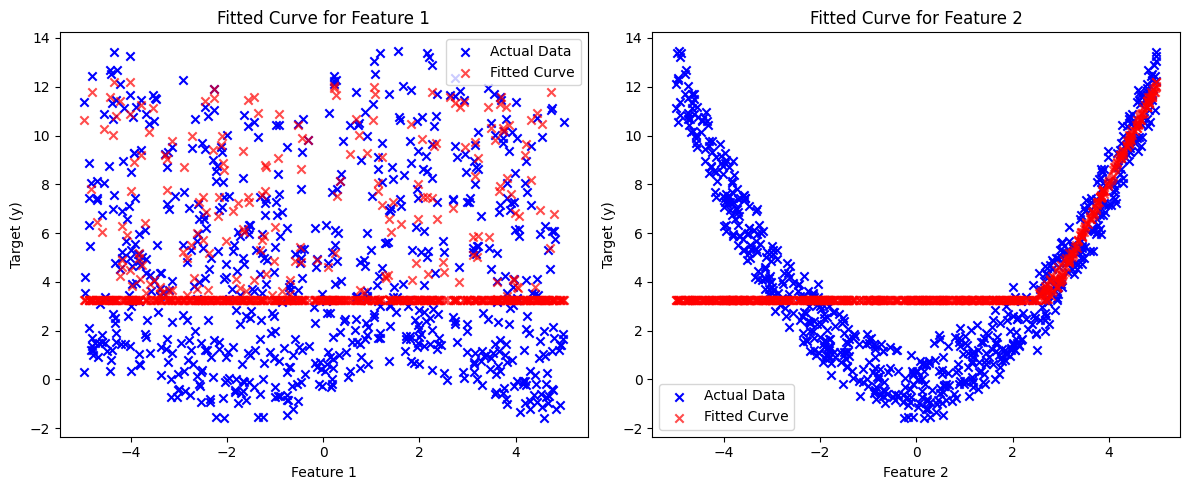

Hidden: 128, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014


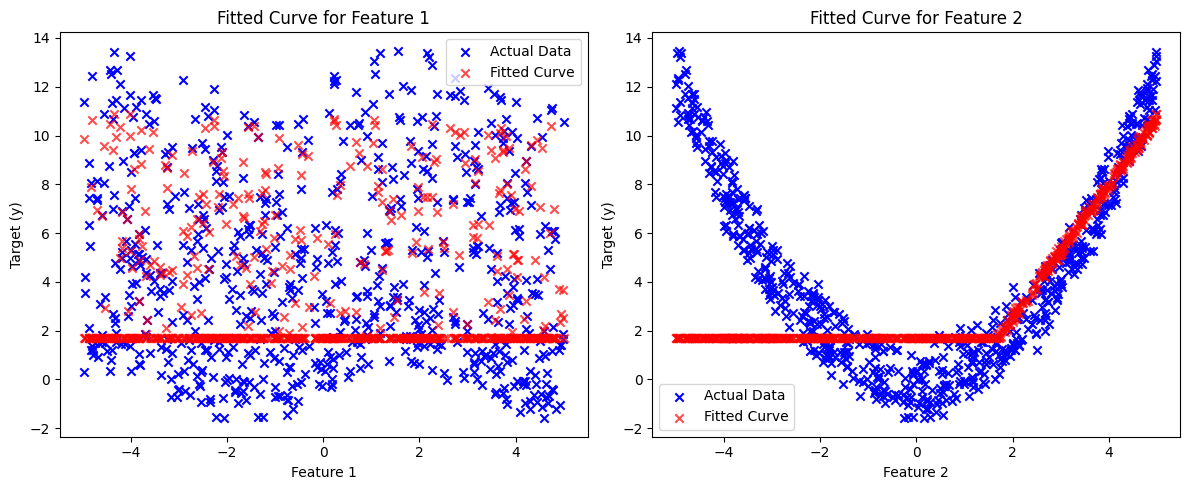

Hidden: 128, LR: 0.001, Loss: mae, Init: zero, Conv: 0.0001


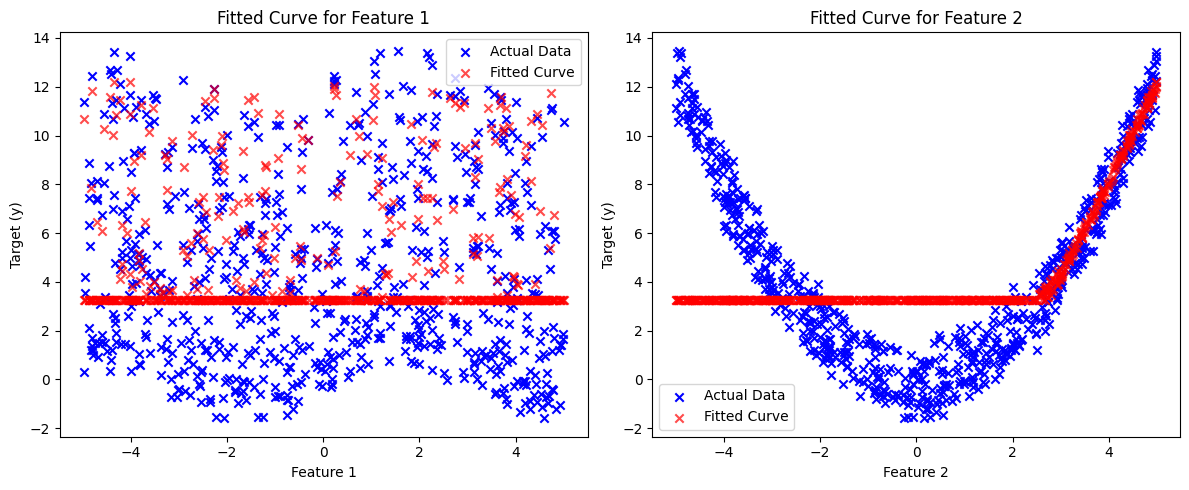

Hidden: 64, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014


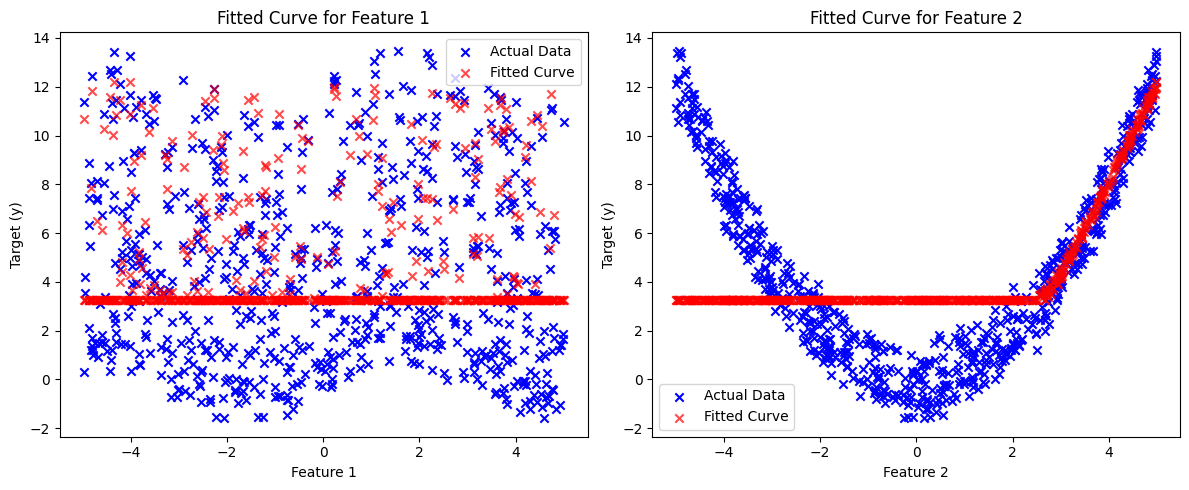

Hidden: 16, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014


In [ ]:
# @title Fitting Curve

for model in models:
  model['model'].plot_fitting_curve(X_train, y_train)
  config = model['config']
  convergence_rate = model['convergence_rate']
  print(f"Hidden: {config['num_hidden']}, LR: {config['learning_rate']}, Loss: {config['loss_name']}, Init: {config['init_method']}, Conv: {convergence_rate:.4f}")

The loss is 0.2023


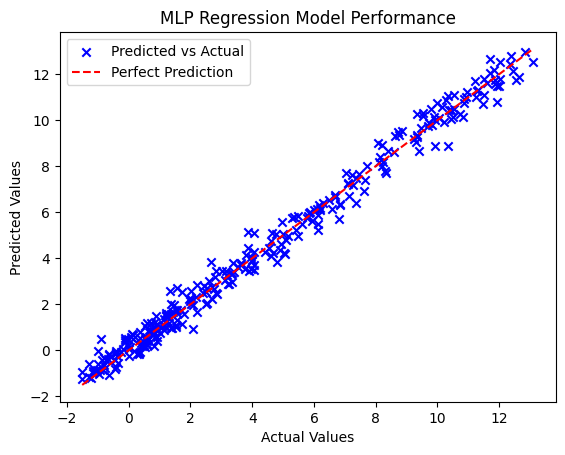

Hidden: 128, LR: 0.01, Loss: mse, Init: random, Conv: 0.0019
The loss is 0.3505


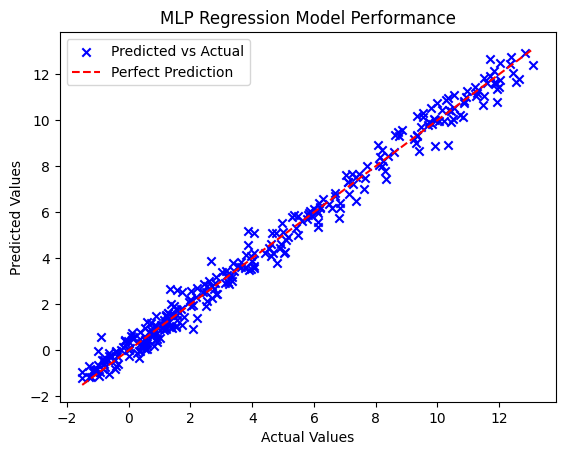

Hidden: 128, LR: 0.01, Loss: mae, Init: random, Conv: 0.0002
The loss is 11.0286


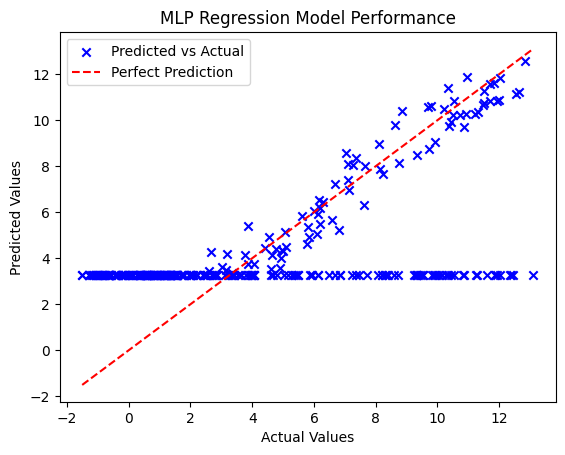

Hidden: 128, LR: 0.01, Loss: mse, Init: zero, Conv: 0.0014
The loss is 2.3287


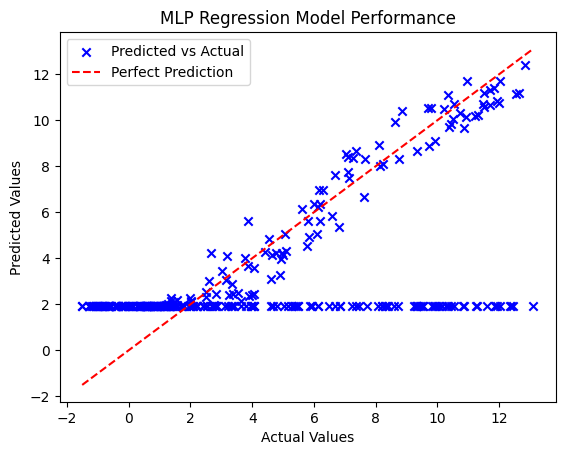

Hidden: 128, LR: 0.01, Loss: mae, Init: zero, Conv: 0.0001
The loss is 11.0435


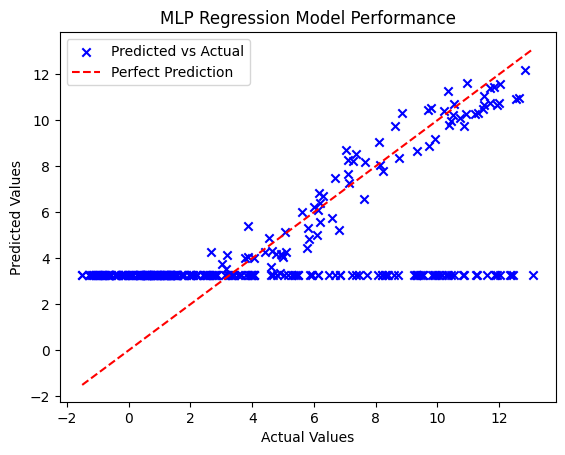

Hidden: 128, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014
The loss is 2.4121


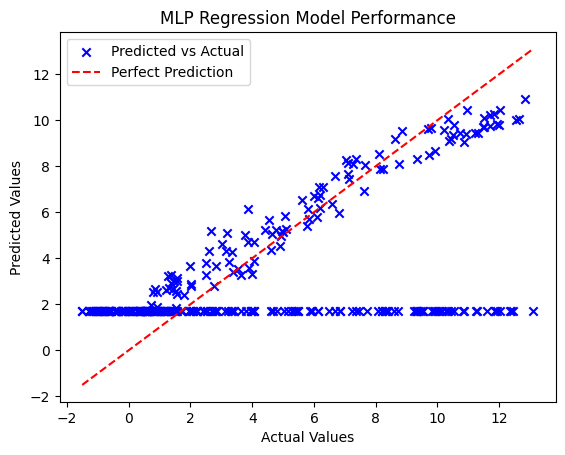

Hidden: 128, LR: 0.001, Loss: mae, Init: zero, Conv: 0.0001
The loss is 11.0385


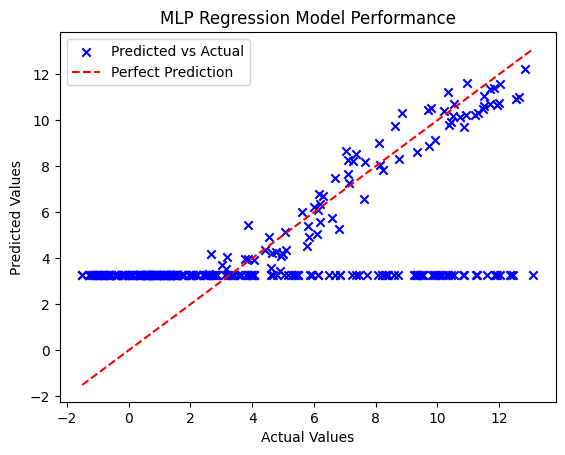

Hidden: 64, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014
The loss is 11.0396


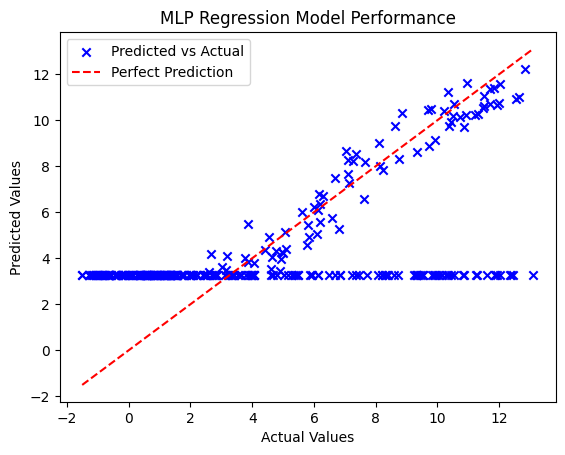

Hidden: 16, LR: 0.001, Loss: mse, Init: zero, Conv: 0.0014


In [ ]:
# @title Model Performance

c = []

for model in models:
  loss = model['model'].test(X_test, y_test)
  c.append({
      'loss': loss,
      'config': model['config'],
      'convergence_rate': model['convergence_rate']
  })
  model['model'].plot(y_test)
  config = model['config']
  convergence_rate = model['convergence_rate']
  print(f"Hidden: {config['num_hidden']}, LR: {config['learning_rate']}, Loss: {config['loss_name']}, Init: {config['init_method']}, Conv: {convergence_rate:.4f}")

In [ ]:
sorted_d = sorted(c, key=lambda x: x['loss'])

for m in sorted_d:
  print(m)

# BEST CONFIG
# 'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.01, 'init_method': 'random', 'loss_name': 'mse'

{'loss': 0.20230686806378667, 'config': {'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.01, 'init_method': 'random', 'loss_name': 'mse'}, 'convergence_rate': 0.0019316581534921018}
{'loss': 0.3504650947562113, 'config': {'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.01, 'init_method': 'random', 'loss_name': 'mae'}, 'convergence_rate': 0.00024018755446817016}
{'loss': 2.3287139374888186, 'config': {'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.01, 'init_method': 'zero', 'loss_name': 'mae'}, 'convergence_rate': 0.00013537958800964405}
{'loss': 2.412061474594681, 'config': {'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.001, 'init_method': 'zero', 'loss_name': 'mae'}, 'convergence_rate': 0.00012951288711559827}
{'loss': 11.028580267236489, 'config': {'num_input': 2, 'num_hidden': 128, 'num_output': 1, 'learning_rate': 0.01, 'init_method': 'zero', 'loss_name': 'mse'}, 'convergence_rate': 0.001

## Observations

### Weight Initialisation

Random initialisation leads to lesser loss than zero initialisation. Zero initialisation leads to symmetry problem and all neurons will learn same gradients. random initialisation gives effective learning.

### Learning Rate

Too low learning rate leads to poor convergence while too high would lead to overshooting the optimum. the larning rate of 0.01 acheived lower less and it didnt get stuck in the local minima.

### Number of Hidden Nodes

As the number of nodes increases the learning increases and allows better feature representation. But too high number of nodes will lead to overfitting.
128 nodes gave very good performance in this case.

### Loss Function

Mean squared error gives lower error than mean absolute error. MSE penalises large errors and makes convergence faster.